In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
from huggingface_hub import hf_hub_download

nltk.download('punkt', quiet=False)

# Verify the download paths
print(f"NLTK data paths: {nltk.data.path}")

# Verify that punkt is available
try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer is available.")
except LookupError:
    print("Punkt tokenizer is NOT available.")

from huggingface_hub import hf_hub_download


NLTK data paths: ['C:\\Users\\Abhipsa Srivastava/nltk_data', 'c:\\Users\\Abhipsa Srivastava\\anaconda3\\nltk_data', 'c:\\Users\\Abhipsa Srivastava\\anaconda3\\share\\nltk_data', 'c:\\Users\\Abhipsa Srivastava\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Abhipsa Srivastava\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
Punkt tokenizer is available.


[nltk_data] Downloading package punkt to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Abhipsa
[nltk_data]    |     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Abhipsa
[nltk_data]    |     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Abhipsa
[nltk_data]    |     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Abhipsa
[nltk_data]    |     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru

KeyboardInterrupt: 

In [33]:
df = pd.read_csv("hf://datasets/wldnjs057/diary_entry/test60.csv")

In [34]:
df.head()

,id,diary_entry,food,philosophy podcast,drinking,coffee,watching,a fun event,I was stressed,all day,...,celebrating birthday,feeling uneasy,new game I played,something exciting and fun,i was in pain,holiday season,turkey eating experience,planning for christmas,I wanted to do something but that did not go well as I thought,hard day
0,0,I woke up to the pitter-patter of rain this mo...,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"Watched ""The Glory"" with Sarah, and it's truly...",0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,"I went to the Usher concert last night, and it...",0,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,3,Sitting by the sea with a latte is one of the ...,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,I finally completed my assignment by midnight....,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df['diary_entry'].values[0]

'I woke up to the pitter-patter of rain this morning and felt an urge to escape my routine. I decided to head to my favorite little cafe, the one tucked away on a quaint side street. The coffee at that cafe is always amazing. The rich aroma enveloped me the moment I stepped inside, warming away the chill of the outside world.'

EDA

Text(0.5, 0, 'Hard Day')

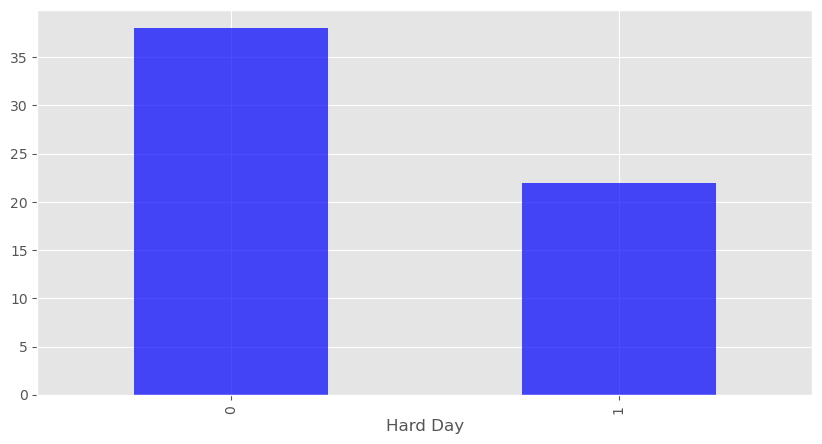

In [36]:
ax=df['hard day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)
ax.set_xlabel("Hard Day")

In [37]:
## NLTK
example = df['diary_entry'][10]
example

"The workload for the NLP class was overwhelming. I found myself relentlessly working without a break. From 9 AM to 11 PM, I couldn't afford a moment away from my chair. It's like time just slipped by as I juggled between assignments, each one more challenging than the last. My brain was constantly buzzing, trying to grasp complex algorithms and theories. Despite the exhaustion, there's a sense of accomplishment in conquering each problem. With this pace, I can only hope for a reprieve soon."

In [38]:
# Download any additional NLTK packages that might be needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
# Ensure punkt_tab is downloaded
nltk.download('punkt_tab')

# Tokenize the example text
token=nltk.word_tokenize(example)
token[0:10]

[nltk_data] Downloading package punkt_tab to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['The',
 'workload',
 'for',
 'the',
 'NLP',
 'class',
 'was',
 'overwhelming',
 '.',
 'I']

In [47]:
# Download the required NLTK resource
nltk.download('averaged_perceptron_tagger')

# Perform POS tagging
tagged=nltk.pos_tag(token)
tagged[0:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('The', 'DT'),
 ('workload', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('NLP', 'NNP'),
 ('class', 'NN'),
 ('was', 'VBD'),
 ('overwhelming', 'VBG'),
 ('.', '.'),
 ('I', 'PRP')]

In [49]:
nltk.download('words')
entites = nltk.chunk.ne_chunk(tagged)
entites.pprint()

[nltk_data] Downloading package words to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


(S
  The/DT
  workload/NN
  for/IN
  the/DT
  (ORGANIZATION NLP/NNP)
  class/NN
  was/VBD
  overwhelming/VBG
  ./.
  I/PRP
  found/VBD
  myself/PRP
  relentlessly/RB
  working/VBG
  without/IN
  a/DT
  break/NN
  ./.
  From/IN
  9/CD
  AM/NNP
  to/TO
  11/CD
  PM/NNP
  ,/,
  I/PRP
  could/MD
  n't/RB
  afford/VB
  a/DT
  moment/NN
  away/RB
  from/IN
  my/PRP$
  chair/NN
  ./.
  It/PRP
  's/VBZ
  like/JJ
  time/NN
  just/RB
  slipped/VBN
  by/IN
  as/IN
  I/PRP
  juggled/VBD
  between/IN
  assignments/NNS
  ,/,
  each/DT
  one/CD
  more/JJR
  challenging/NN
  than/IN
  the/DT
  last/JJ
  ./.
  My/PRP$
  brain/NN
  was/VBD
  constantly/RB
  buzzing/VBG
  ,/,
  trying/VBG
  to/TO
  grasp/VB
  complex/JJ
  algorithms/NN
  and/CC
  theories/NNS
  ./.
  Despite/IN
  the/DT
  exhaustion/NN
  ,/,
  there/EX
  's/VBZ
  a/DT
  sense/NN
  of/IN
  accomplishment/NN
  in/IN
  conquering/VBG
  each/DT
  problem/NN
  ./.
  With/IN
  this/DT
  pace/NN
  ,/,
  I/PRP
  can/MD
  only/RB
  hope/VB
  for/

VADER Sentiment Scoring

In [54]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Abhipsa
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...


In [56]:
sia.polarity_scores("I am happy.")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [58]:
sia.polarity_scores(example)

{'neg': 0.033, 'neu': 0.853, 'pos': 0.115, 'compound': 0.6911}

In [61]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['diary_entry']
    myid = row['id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/60 [00:00<?, ?it/s]

In [62]:
res

{0: {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.9136},
 1: {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.9542},
 2: {'neg': 0.106, 'neu': 0.74, 'pos': 0.154, 'compound': 0.6239},
 3: {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9915},
 4: {'neg': 0.031, 'neu': 0.867, 'pos': 0.101, 'compound': 0.6747},
 5: {'neg': 0.093, 'neu': 0.673, 'pos': 0.234, 'compound': 0.8765},
 6: {'neg': 0.195, 'neu': 0.765, 'pos': 0.039, 'compound': -0.8625},
 7: {'neg': 0.202, 'neu': 0.723, 'pos': 0.075, 'compound': -0.8656},
 8: {'neg': 0.058, 'neu': 0.822, 'pos': 0.119, 'compound': 0.6778},
 9: {'neg': 0.196, 'neu': 0.632, 'pos': 0.172, 'compound': -0.0498},
 10: {'neg': 0.033, 'neu': 0.853, 'pos': 0.115, 'compound': 0.6911},
 11: {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.9096},
 12: {'neg': 0.178, 'neu': 0.69, 'pos': 0.132, 'compound': -0.533},
 13: {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9876},
 14: {'neg': 0.02, 'neu': 0.676, 'pos': 0.304, 'compo

In [65]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df,how='left')
vaders

,id,neg,neu,pos,compound,diary_entry,food,philosophy podcast,drinking,coffee,...,celebrating birthday,feeling uneasy,new game I played,something exciting and fun,i was in pain,holiday season,turkey eating experience,planning for christmas,I wanted to do something but that did not go well as I thought,hard day
0,0,0.000,0.795,0.205,0.9136,I woke up to the pitter-patter of rain this mo...,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000,0.747,0.253,0.9542,"Watched ""The Glory"" with Sarah, and it's truly...",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,0.106,0.740,0.154,0.6239,"I went to the Usher concert last night, and it...",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0.000,0.627,0.373,0.9915,Sitting by the sea with a latte is one of the ...,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0.031,0.867,0.101,0.6747,I finally completed my assignment by midnight....,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5,0.093,0.673,0.234,0.8765,"Lately, I've noticed that Mom seems to be goin...",0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,6,0.195,0.765,0.039,-0.8625,"I spent hours staring at my computer screen, t...",0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,7,0.202,0.723,0.075,-0.8656,"Yesterday, I completely failed two quizzes, an...",0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
8,8,0.058,0.822,0.119,0.6778,I can't seem to fall asleep tonight. Was it th...,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,9,0.196,0.632,0.172,-0.0498,Anna's gossiping is getting to be too much. To...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


plot

<Axes: xlabel='hard day', ylabel='compound'>

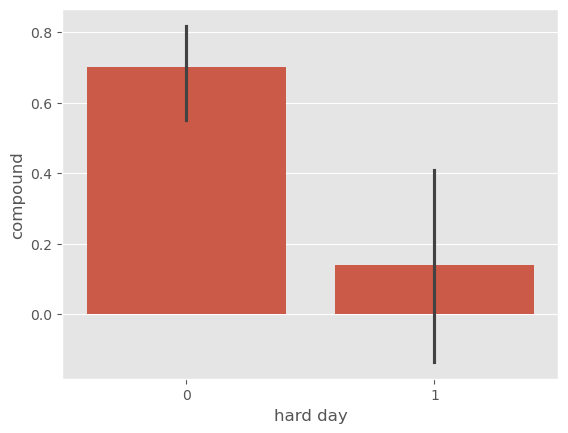

In [66]:
sns.barplot(data=vaders, x='hard day', y='compound')

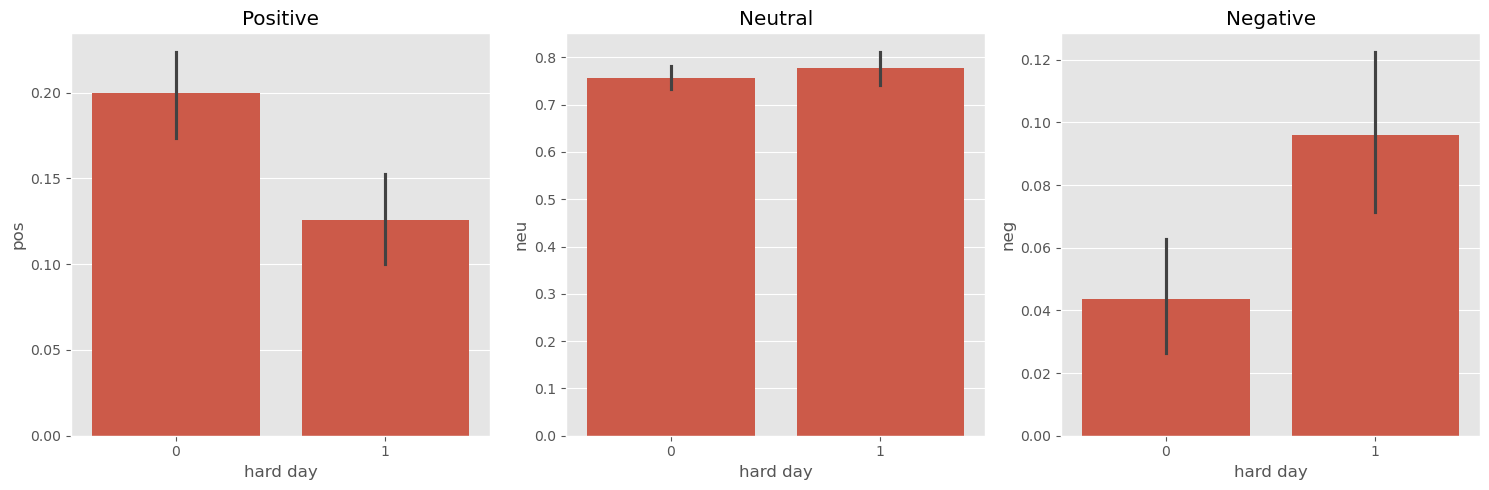

In [71]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='hard day', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='hard day', y='neu',ax=axs[1])  
sns.barplot(data=vaders, x='hard day', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()


Step3: Roberta Pretained Model